In [8]:
import pandas as pd
from random import randint

data = pd.read_excel('dataset/togel-hongkong.xlsx')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   TANGGAL       1169 non-null   datetime64[ns]
 1   HARI          1169 non-null   object        
 2   PERIODE       1169 non-null   int64         
 3   NOMOR KELUAR  1169 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 36.7+ KB


In [9]:
data

,TANGGAL,HARI,PERIODE,NOMOR KELUAR
0,2024-10-01 23:03:25,selasa,1169,9206
1,2024-09-30 23:08:08,Senin,1168,9697
2,2024-09-29 23:03:25,Minggu,1167,7800
3,2024-09-28 23:03:25,Sabtu,1166,4349
4,2024-09-27 23:03:25,jumat,1165,3406
...,...,...,...,...
1164,2021-07-25 20:24:04,Minggu,5,4359
1165,2021-07-24 20:23:26,Sabtu,4,8920
1166,2021-07-23 20:23:00,Jumat,3,2805
1167,2021-07-22 20:22:36,Kamis,2,6353


Text(0, 0.5, 'nomor')

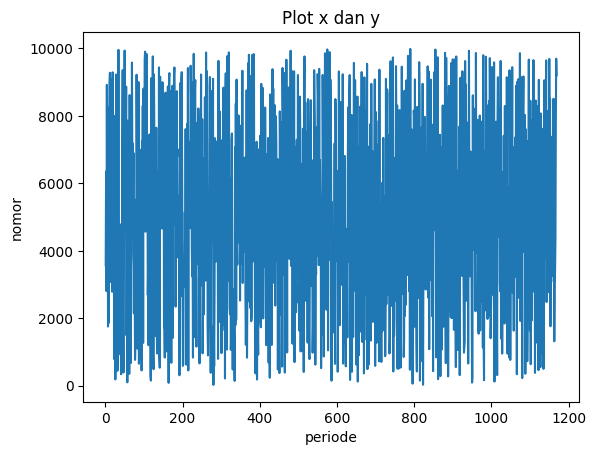

In [10]:
import matplotlib.pyplot as plt

x_plot = data.sort_values('PERIODE')['PERIODE']
y_plot = data.sort_values('PERIODE')['NOMOR KELUAR']

# Membuat plot
plt.plot(x_plot, y_plot)

# Memberi judul dan label sumbu
plt.title("Plot x dan y")
plt.xlabel("periode")
plt.ylabel("nomor")

# create_sliding windows

In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Data deret waktu
new_data = y_plot.head(1062)
print(new_data)

# Ukuran jendela
w_size = [10,11,20,30,40,50,60]
n_pred = 5
print(new_data.shape)

1168    3570
1167    6353
1166    2805
1165    8920
1164    4359
        ... 
111     1630
110     4887
109     6704
108     3226
107     7361
Name: NOMOR KELUAR, Length: 1062, dtype: int64
(1062,)


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def create_sliding_window(data, window_size, n_predictions):
    X, y = [], []
    for i in range(len(data) - window_size - n_predictions + 1):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size:i + window_size + n_predictions])
    return np.array(X), np.array(y)

def matrices(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mse)
    print("Mean Absolute Error for prediction :", mae)
    print("Mean Squared Error for prediction :", mse)
    print("Root Mean Squared Error for prediction :", rmse)
    return mae, mse, rmse

In [13]:
# Membagi data menjadi training dan testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# budi ways

In [228]:
# new_data = new_data.reshape(-1,1)
# new_data.shape

In [229]:
# SEQ_LEN = 21 # 6, 11, 21
# SPLIT = 0.90 # 0.80, 0.90
# WINDOW_SIZE = SEQ_LEN - 1

In [230]:
# def to_sequences(data, seq_len):
#     d = []
#     for index in range(len(data) - seq_len):
#         d.append(data[index: index + seq_len])
#     return np.array(d)

# def preprocess(data_raw, seq_len, train_split):
#     data = to_sequences(data_raw, seq_len)
#     num_train = int(train_split * data.shape[0])
#     X_train = data[:num_train, :-1, :]
#     y_train = data[:num_train, -1, :]
#     X_test = data[num_train:, :-1, :]
#     y_test = data[num_train:, -1, :]
#     return X_train, y_train, X_test, y_test

# X_train, y_train, X_test, y_test = preprocess(new_data, SEQ_LEN, train_split = SPLIT)

In [231]:
# print (X_train)
# print (y_train)
# print (X_test)
# print (y_test)

# tes beberapa model

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale = np.array(new_data).reshape(-1,1)
sclae = scaler.fit_transform(scale)

new_data_scale = pd.DataFrame(sclae, columns=['Scaled'])
new_data_scale = new_data_scale.values.flatten()
new_data_scale.shape

In [395]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
import lightgbm as lgb

def train (X_train, X_test, y_train, y_test,models):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"Results for {model_name}:")
        matrices(y_test, y_pred)
        print()  # Baris kosong untuk pemisah

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "xgboost": XGBRegressor(),
    "XgboostRF": XGBRFRegressor()
}

In [396]:
for i in w_size:
    X, y = create_sliding_window(new_data_scale, window_size= i, n_predictions = n_pred)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print('with w_size = ',i)
    train(X_train, X_test, y_train, y_test,models)


with w_size =  10
Results for Linear Regression:
Mean Absolute Error for prediction : 0.25360039058936323
Mean Squared Error for prediction : 0.08529149726063878
Root Mean Squared Error for prediction : 0.2920470805548975

Results for Random Forest:
Mean Absolute Error for prediction : 0.25670321649583067
Mean Squared Error for prediction : 0.08766452043088568
Root Mean Squared Error for prediction : 0.29608194884336614

Results for xgboost:
Mean Absolute Error for prediction : 0.27818965321549083
Mean Squared Error for prediction : 0.11035260439247432
Root Mean Squared Error for prediction : 0.33219362485224535

Results for XgboostRF:
Mean Absolute Error for prediction : 0.25635972784907957
Mean Squared Error for prediction : 0.08787475791217063
Root Mean Squared Error for prediction : 0.2964367688262889

with w_size =  11
Results for Linear Regression:
Mean Absolute Error for prediction : 0.25396079487930895
Mean Squared Error for prediction : 0.08580873821054748
Root Mean Squared Er

# train with linear and rf with window 50 and 60 

In [7]:
import numpy as np

i = 50
# Get the last 100 numbers
tes = data.sort_values('PERIODE')['NOMOR KELUAR']
tes = tes.tail(100)
print(tes)
# tes = tes.head(99)
last_numbers = np.array(tes)

# Ensure last_numbers has the correct size for prediction
if last_numbers.shape[0] >= i:
    # Reshape to (1, i) to match the input shape for the model
    last_numbers = last_numbers[-i:].reshape(1, -1)  # Take the last i numbers
else:
    raise ValueError("Not enough numbers to make a prediction.")

print(last_numbers)

# Create sliding window data
X, y = create_sliding_window(new_data, window_size=i, n_predictions=n_pred)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)
matrices(y_test, y_pred)

# Predict the next number using last_numbers
predicted_number = model.predict(last_numbers)

print("Prediksi nomor lotre selanjutnya:", predicted_number.round())

99    2601
98    9089
97    3723
96    8350
95    6008
      ... 
4     2992
3     3406
2     4349
1     7800
0     9697
Name: NOMOR KELUAR, Length: 100, dtype: int64
[[8296 7122 4533  461 9070 1393 4118 5985  549 8074  963 5305 1490 7618
  3843 6519  498 7267 9057 7116 3768 5976 8461 9647 2480 6091 4525 8145
  3401 4982 2774 9690 6421 8508 1762 5213 3070 5714 3247 7388 4194 5938
  8510 5188 1316 2992 3406 4349 7800 9697]]
Mean Absolute Error for prediction : 2585.3092137492417
Mean Squared Error for prediction : 9079906.966172937
Root Mean Squared Error for prediction : 3013.288397444383
Prediksi nomor lotre selanjutnya: [[4661. 6053. 5395. 4836. 5039.]]


In [15]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

win = 50
# Get the last 100 numbers
new_data = y_plot[:1064]
tes = data.sort_values('PERIODE')['NOMOR KELUAR']
tes = tes[1064:]
# tes = tes.head(99)
last_numbers = np.array(tes)

# Ensure last_numbers has the correct size for prediction
if last_numbers.shape[0] >= win:
    # Reshape to (1, i) to match the input shape for the model
    last_numbers = last_numbers[-win:].reshape(1, -1)  # Take the last i numbers
else:
    raise ValueError("Not enough numbers to make a prediction.")

print(last_numbers,'\n\n')

# # Create sliding window data
# X, y = create_sliding_window(new_data, window_size=win, n_predictions=n_pred)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the model
model = RandomForestRegressor()
# model.fit(X_train, y_train)

# # Predict using the test set
# y_pred = model.predict(X_test)
# matrices(y_test, y_pred)

# # Predict the next number using last_numbers
# predicted_number = model.predict(last_numbers)

# print("Prediksi nomor lotre selanjutnya:", predicted_number.round())

for i in range(10):
    X, y = create_sliding_window(new_data, window_size=win, n_predictions=n_pred)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    matrices(y_test,y_pred)
    predicted_number = model.predict(last_numbers)
    print("Prediksi nomor lotre selanjutnya:", predicted_number.round(),"\n")

[[7122 4533  461 9070 1393 4118 5985  549 8074  963 5305 1490 7618 3843
  6519  498 7267 9057 7116 3768 5976 8461 9647 2480 6091 4525 8145 3401
  4982 2774 9690 6421 8508 1762 5213 3070 5714 3247 7388 4194 5938 8510
  5188 1316 2992 3406 4349 7800 9697 9206]] 


Mean Absolute Error for prediction : 2555.1169603960393
Mean Squared Error for prediction : 8654281.194086835
Root Mean Squared Error for prediction : 2941.815968766033
Prediksi nomor lotre selanjutnya: [[4728. 5255. 4742. 4987. 4929.]] 

Mean Absolute Error for prediction : 2544.101504950496
Mean Squared Error for prediction : 8652706.670596829
Root Mean Squared Error for prediction : 2941.548345786081
Prediksi nomor lotre selanjutnya: [[4946. 4506. 4995. 4762. 5575.]] 

Mean Absolute Error for prediction : 2539.0736336633663
Mean Squared Error for prediction : 8560742.719596136
Root Mean Squared Error for prediction : 2925.8746930783173
Prediksi nomor lotre selanjutnya: [[4968. 4576. 5422. 4886. 5427.]] 

Mean Absolute Error 

# pemecah angka

In [28]:
import pandas as pd

# Contoh dataframe dengan satu kolom angka
data = pd.read_excel('dataset/togel-hongkong.xlsx')
data = data.sort_values('PERIODE')

pick_dat = data['NOMOR KELUAR']

In [29]:
print(pick_dat)

1168    3570
1167    6353
1166    2805
1165    8920
1164    4359
        ... 
4       3406
3       4349
2       7800
1       9697
0       9206
Name: NOMOR KELUAR, Length: 1169, dtype: int64


In [55]:
# iff u want to add new number 
# pick_dat.loc[len(pick_dat)] = 5938

In [30]:
import itertools
import random
# Fungsi untuk menghasilkan kombinasi dua digit
def generate_combinations(num):
    num_str = str(num)
    combinations = []
    
    # Mengambil setiap kombinasi dua digit
    combinations = [''.join(pair) for pair in itertools.permutations(num_str, 2)]
    unique_list = list(set(combinations))

    return unique_list[:7]
    # return six_num

# Terapkan fungsi pada kolom 'angka'
pick_dat['kombinasi'] = pick_dat.apply(generate_combinations)

# Mengubah daftar kombinasi menjadi kolom-kolom
kombinasi_df = pick_dat['kombinasi'].apply(pd.Series)

# Menampilkan hasil
print(kombinasi_df)


       0   1   2   3   4   5   6
1168  05  53  07  37  03  57  50
1167  56  53  33  63  35  36  65
1166  05  82  52  08  20  28  85
1165  82  92  90  08  98  29  20
1164  94  53  59  93  49  43  45
...   ..  ..  ..  ..  ..  ..  ..
4     06  60  03  43  34  40  63
3     94  93  49  43  44  34  39
2     07  87  78  08  00  80  70
1     99  96  79  69  67  76  97
0     96  92  06  69  60  90  26

[1169 rows x 7 columns]


C:\Users\alam\AppData\Local\Temp\ipykernel_137536\836496408.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pick_dat['kombinasi'] = pick_dat.apply(generate_combinations)


In [31]:
kombinasi_df.to_excel('dataset/togel7.xlsx',index=False)

# tes menggunakan data togel 7

In [32]:
nomor = pd.read_excel("dataset/togel7.xlsx")

nomor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1169 non-null   int64  
 1   1       1168 non-null   float64
 2   2       1163 non-null   float64
 3   3       1117 non-null   float64
 4   4       1095 non-null   float64
 5   5       1095 non-null   float64
 6   6       1008 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 64.1 KB


In [33]:
print(nomor.isna().sum())

nomor =  nomor.fillna(0)

print('after fill:\n',nomor.isna().sum())

0      0
1      1
2      6
3     52
4     74
5     74
6    161
dtype: int64
after fill:
 0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64


In [34]:
nomor

,0,1,2,3,4,5,6
0,5,53.0,7.0,37.0,3.0,57.0,50.0
1,56,53.0,33.0,63.0,35.0,36.0,65.0
2,5,82.0,52.0,8.0,20.0,28.0,85.0
3,82,92.0,90.0,8.0,98.0,29.0,20.0
4,94,53.0,59.0,93.0,49.0,43.0,45.0
...,...,...,...,...,...,...,...
1164,6,60.0,3.0,43.0,34.0,40.0,63.0
1165,94,93.0,49.0,43.0,44.0,34.0,39.0
1166,7,87.0,78.0,8.0,0.0,80.0,70.0
1167,99,96.0,79.0,69.0,67.0,76.0,97.0


In [35]:
data_flat = nomor.apply(lambda row: np.array(row), axis=1)
data_flat = np.vstack(data_flat)  # Convert to a 2D array

In [36]:
def create_sliding_window7(data, window_size, n_predictions):
    X = []
    y = []
    for i in range(len(data) - window_size - n_predictions + 1):
        X.append(data[i:i + window_size].flatten())  # Flatten the window
        y.append(data[i + window_size:i + window_size + n_predictions].flatten())  # Target
    return np.array(X), np.array(y)

In [37]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

i = 50
# new_data is 1060 data head 
new_data = data_flat[:1067]
print(new_data.shape)
# tes data is for making prediction... it is the last 100 data
tes = data_flat[1067:]
print(tes.shape)
tes = tes[-i:].flatten().reshape(1, -1)

X, y = create_sliding_window7(new_data, window_size=i, n_predictions=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)
matrices(y_test, y_pred)

# Predict the next number using last_numbers
predicted_number = model.predict(tes)
predicted_number = np.unique(predicted_number.round()) 
print("Prediksi nomor lotre selanjutnya:", predicted_number)

(1067, 7)
(102, 7)
Mean Absolute Error for prediction : 25.40661224489796
Mean Squared Error for prediction : 875.3512486699508
Root Mean Squared Error for prediction : 29.586335505938393
Prediksi nomor lotre selanjutnya: [38. 42. 45. 46. 47. 48. 49. 50. 51. 52. 55. 57. 60.]


In [38]:
from collections import Counter

# Array hasil prediksi
arr = predicted_number

# Uraikan setiap angka menjadi digit terpisah
all_digits = [int(digit) for number in arr for digit in str(number) if digit.isdigit()]

# Menghitung jumlah kemunculan setiap digit
digit_count = Counter(all_digits)

# Cetak hasilnya
for digit, freq in digit_count.items():
    if digit == 0 :
        freq = freq - len(predicted_number)
    print(f"Digit {digit} muncul {freq} kali")

Digit 3 muncul 1 kali
Digit 8 muncul 2 kali
Digit 0 muncul 2 kali
Digit 4 muncul 6 kali
Digit 2 muncul 2 kali
Digit 5 muncul 7 kali
Digit 6 muncul 2 kali
Digit 7 muncul 2 kali
Digit 9 muncul 1 kali
Digit 1 muncul 1 kali


# train predict biasa dengan RF

In [345]:
dat_train = nomor.head(1059)
dat_test = nomor.tail(100)

x = nomor.iloc[:,0:]
y = 

In [346]:
x

,0,1,2,3,4,5,6
0,3,5.0,53.0,37.0,35.0,75.0,50.0
1,36,53.0,35.0,63.0,65.0,33.0,56.0
2,85,5.0,58.0,20.0,2.0,52.0,50.0
3,98,90.0,9.0,20.0,8.0,80.0,29.0
4,94,93.0,53.0,35.0,49.0,39.0,59.0
...,...,...,...,...,...,...,...
1155,75,15.0,17.0,51.0,41.0,71.0,47.0
1156,23,32.0,37.0,47.0,72.0,24.0,34.0
1157,78,37.0,38.0,88.0,83.0,87.0,73.0
1158,94,44.0,41.0,49.0,19.0,14.0,91.0
